# Lab 6 - Data Visualization with Seaborn

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

Importing:

In [173]:
week_3 = pd.read_csv("nfloffenseweek3.csv")
week_4 = pd.read_csv("nfloffenseweek4.csv")
week_5 = pd.read_csv("nfloffenseweek5.csv")
week_6 = pd.read_csv("nfloffenseweek6.csv")
week_7 = pd.read_csv("nfloffenseweek7.csv")

div_conf = pd.read_csv("nfl_teams.csv")
colors_logos = pd.read_csv("teams_colors_logos.csv")

Adding 'week' Column:

In [174]:
# Add "Week" column
week_3['week'] = '3'
week_4['week'] = '4'
week_5['week'] = '5'
week_5['week'] = '5'
week_6['week'] = '6'

# combine the weeks
three_datasets = pd.concat( [week_3, week_4, week_5])
all_weeks = pd.concat( [three_datasets, week_5, week_6] )
all_weeks.tail()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
27,28,Pittsburgh Steelers,6,97,1749,367,4.8,9,3,107,...,4,3.6,30,37,258,7,28.4,10.4,-22.40,6
28,29,Tennessee Titans,5,96,1391,282,4.9,6,3,84,...,6,3.7,26,37,331,11,29.6,7.4,2.64,6
29,30,Chicago Bears,6,93,1762,335,5.3,10,5,93,...,5,5.2,47,31,253,11,32.3,12.9,-8.07,6
30,31,Denver Broncos,6,91,1976,373,5.3,7,4,97,...,2,4.3,29,54,486,10,30.4,8.7,-21.39,6
31,32,Houston Texans,5,86,1456,293,5.0,5,1,83,...,3,4.3,26,30,251,13,31.0,8.6,-14.95,6


Renaming columns for merge:

In [175]:
div_conf.rename(columns = {'Name':'team'}, inplace = True)
colors_logos.rename(columns = {'team_name':'team'}, inplace = True)

Merging div_conf and colors_logos to all_weeks:

In [176]:
first_merge = pd.merge(all_weeks, div_conf, on = 'team')
all_datasets = pd.merge(first_merge, colors_logos, on = 'team')
all_datasets.tail()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
145,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
146,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
147,32,Indianapolis Colts,5,69,1665,343,4.9,11,4,101,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
148,32,Indianapolis Colts,5,69,1665,343,4.9,11,4,101,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
149,25,Indianapolis Colts,6,103,2099,417,5.0,11,4,130,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

c:\Users\ed2to\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


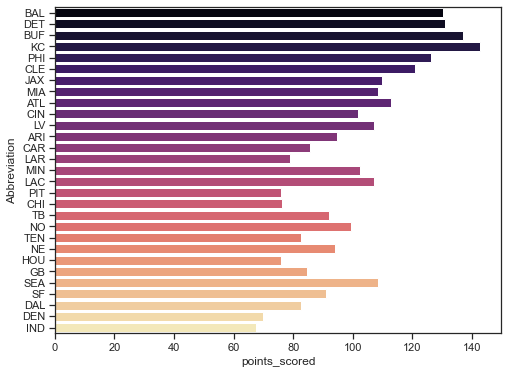

In [274]:
points = all_datasets.groupby('Abbreviation').points_scored.mean()
plt.figure(figsize = (8,6))

sns.barplot( all_datasets.points_scored, y = all_datasets.Abbreviation, 
    palette='magma',
    ci = None );

# but this doesnt really show the average points per week?

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

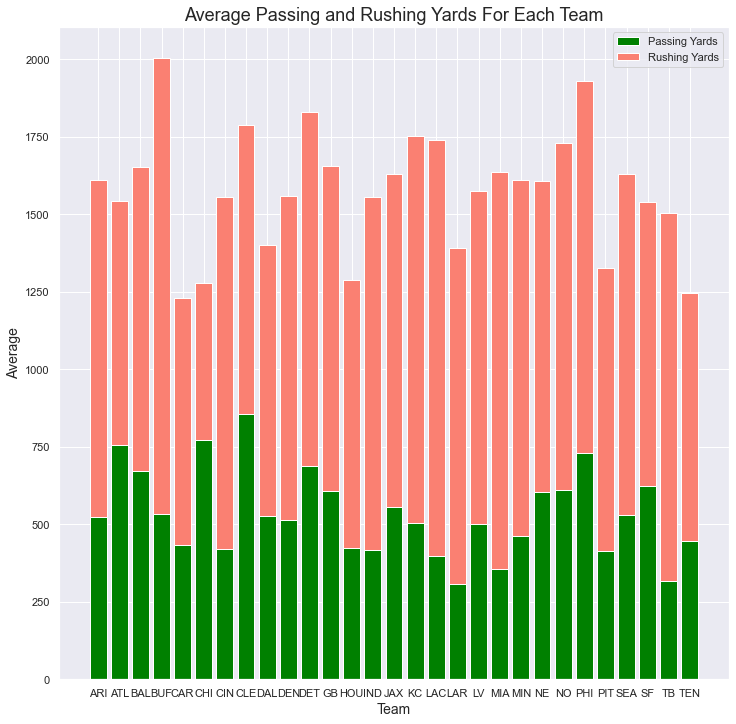

In [ ]:
passing_average = all_datasets.groupby('Abbreviation').passing_yards.mean()
rushing_average = all_datasets.groupby('Abbreviation').rushing_yards.mean()

plt.figure(figsize = (12,12))
plt.bar(passing_average.index, rushing_average, label = 'Passing Yards',color = ['green']);
plt.bar(passing_average.index, passing_average, bottom = rushing_average, label = 'Rushing Yards', color = ['salmon']);

# styling:
# sns.set_theme()
plt.legend(loc="upper right")
plt.title('Average Passing and Rushing Yards For Each Team', fontsize=18)
plt.xlabel('Team', fontsize = 14)
plt.ylabel('Average', fontsize = 14)
sns.set_style("darkgrid")


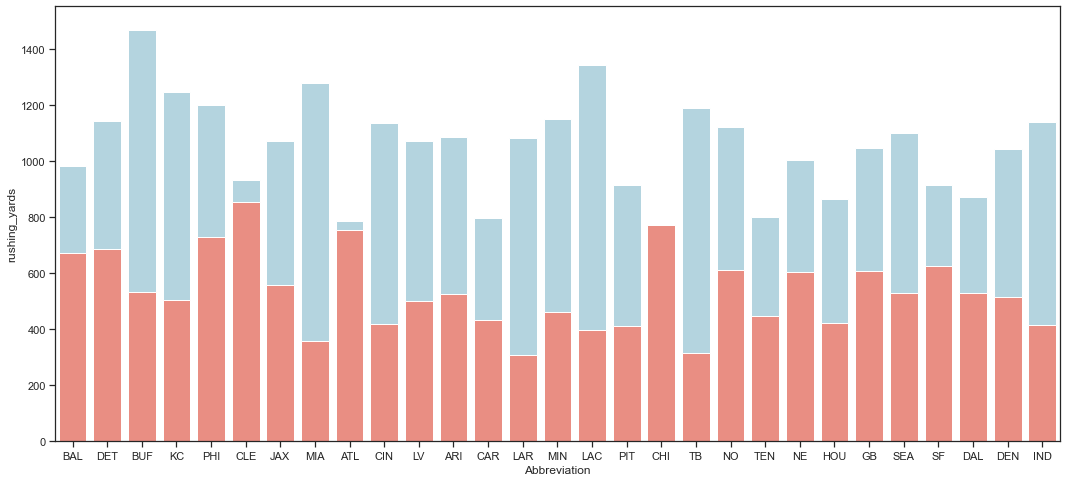

In [269]:
plt.figure(figsize = (18,8))
sns.barplot( data = all_datasets, x = all_datasets.Abbreviation, y=all_datasets.passing_yards,
    color = 'lightblue',
    ci=False,
    estimator=np.mean

     );
sns.barplot( data = all_datasets, x = all_datasets.Abbreviation, y=all_datasets.rushing_yards,
    color = 'salmon',
    ci=False,
    );

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

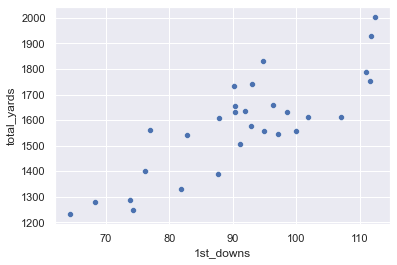

In [ ]:
ave_totalyards = all_datasets.groupby('Abbreviation').total_yards.mean()
ave_1stdowns = all_datasets.groupby('Abbreviation')['1st_downs'].mean()

sns.scatterplot(x=ave_1stdowns, y=ave_totalyards, palette='BrBG');

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

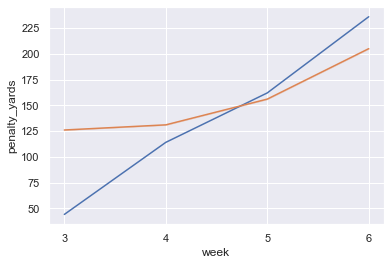

In [200]:
# penalty_yards for Baltimore Ravens and LA Rams each week

ravens = all_datasets[all_datasets.team.isin(['Baltimore Ravens'])]
rams = all_datasets[all_datasets.team.isin(['Los Angeles Rams'])]

sns.lineplot(data=ravens, x="week", y="penalty_yards");
sns.lineplot(data=rams, x="week", y="penalty_yards");

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

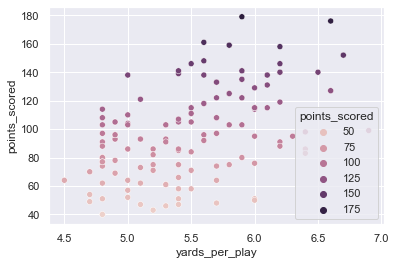

In [236]:
average_points = all_datasets.groupby('Abbreviation').points_scored.mean()
average_yards = all_datasets.groupby('Abbreviation').yards_per_play.mean()

sns.scatterplot(data = all_datasets, x="yards_per_play", y="points_scored", hue="points_scored");

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

C:\Users\ed2to\AppData\Local\Temp\ipykernel_17048\4067617544.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nfc_west = in_nfc[all_datasets.Division.isin( ['West'] )]


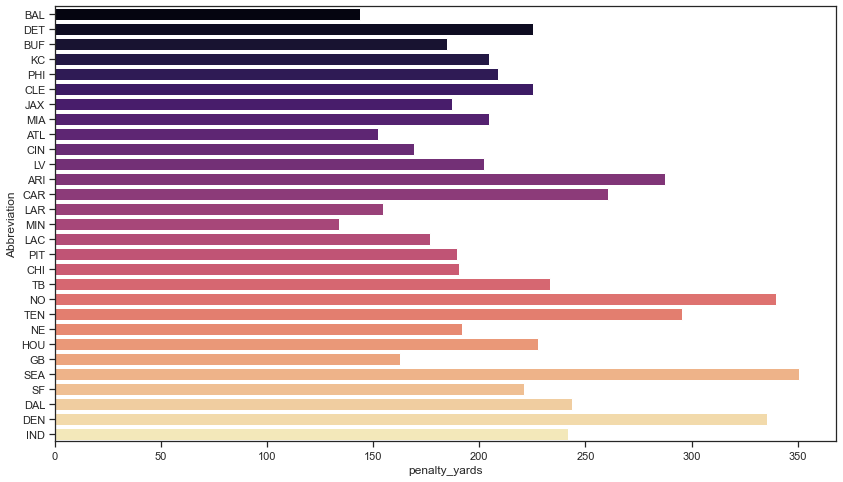

In [268]:
in_nfc = all_datasets[all_datasets.Conference.isin( ['NFC'] )]
nfc_west = in_nfc[all_datasets.Division.isin( ['West'] )]
nfc_west

plt.figure(figsize = (14,8))
sns.set_style("ticks")
sns.barplot(data = all_datasets, x = 'penalty_yards', y = 'Abbreviation', 
ci=None, 
palette = 'magma',
);

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

<AxesSubplot:>

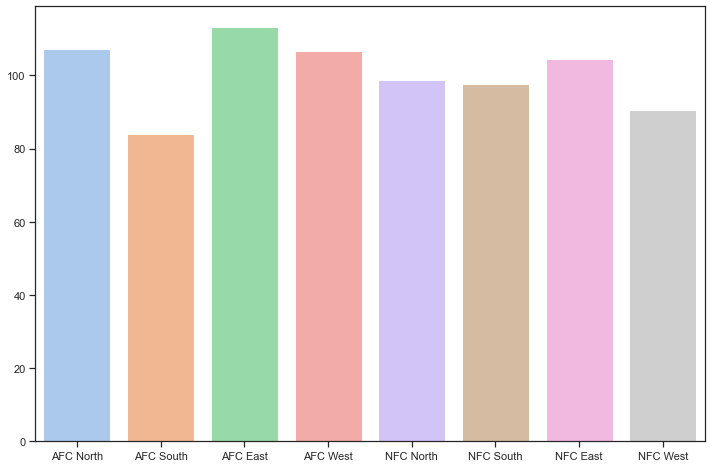

In [267]:
conf_list = ['AFC', 'NFC']
division = ['North', 'South', 'East', 'West']
x = []
y= []

for conf in conf_list:
    for div in division:
        merged = (all_datasets['Conference'] == conf) & (all_datasets['Division'] == div)
        points_ave = all_datasets[merged].points_scored.mean()
        x.append(f'{conf} {div}')
        y.append(points_ave)


plt.figure(figsize = (12,8))
sns.barplot(data = all_datasets, x =x, y = y)
